In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import pickle

In [2]:
dados = pd.read_csv('Consumo_cerveja.csv', sep=';')

In [3]:
dados.head()

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900


In [4]:
dados.describe().round(2)

,temp_media,temp_min,temp_max,chuva,fds,consumo
count,365.00,365.00,365.00,365.00,365.00,365.00
mean,21.23,17.46,26.61,5.20,0.28,25401.37
std,3.18,2.83,4.32,12.42,0.45,4399.14
min,12.90,10.60,14.50,0.00,0.00,14343.00
25%,19.02,15.30,23.80,0.00,0.00,22008.00
50%,21.38,17.90,26.90,0.00,0.00,24867.00
75%,23.28,19.60,29.40,3.20,1.00,28631.00
max,28.86,24.50,36.50,94.80,1.00,37937.00


In [5]:
#correlações positivas indicam que as duas variáveis se movem na mesma direção e correlações negativas indicam uma relação oposta.
dados.corr(numeric_only= True).round(4)

,temp_media,temp_min,temp_max,chuva,fds,consumo
temp_media,1.0000,0.8628,0.9225,0.0244,-0.0508,0.5746
temp_min,0.8628,1.0000,0.6729,0.0986,-0.0595,0.3925
temp_max,0.9225,0.6729,1.0000,-0.0493,-0.0403,0.6427
chuva,0.0244,0.0986,-0.0493,1.0000,0.0016,-0.1938
fds,-0.0508,-0.0595,-0.0403,0.0016,1.0000,0.5060
consumo,0.5746,0.3925,0.6427,-0.1938,0.5060,1.0000


Visualizando o comportamento da variável dependente do nosso modelo ao longo do tempo.

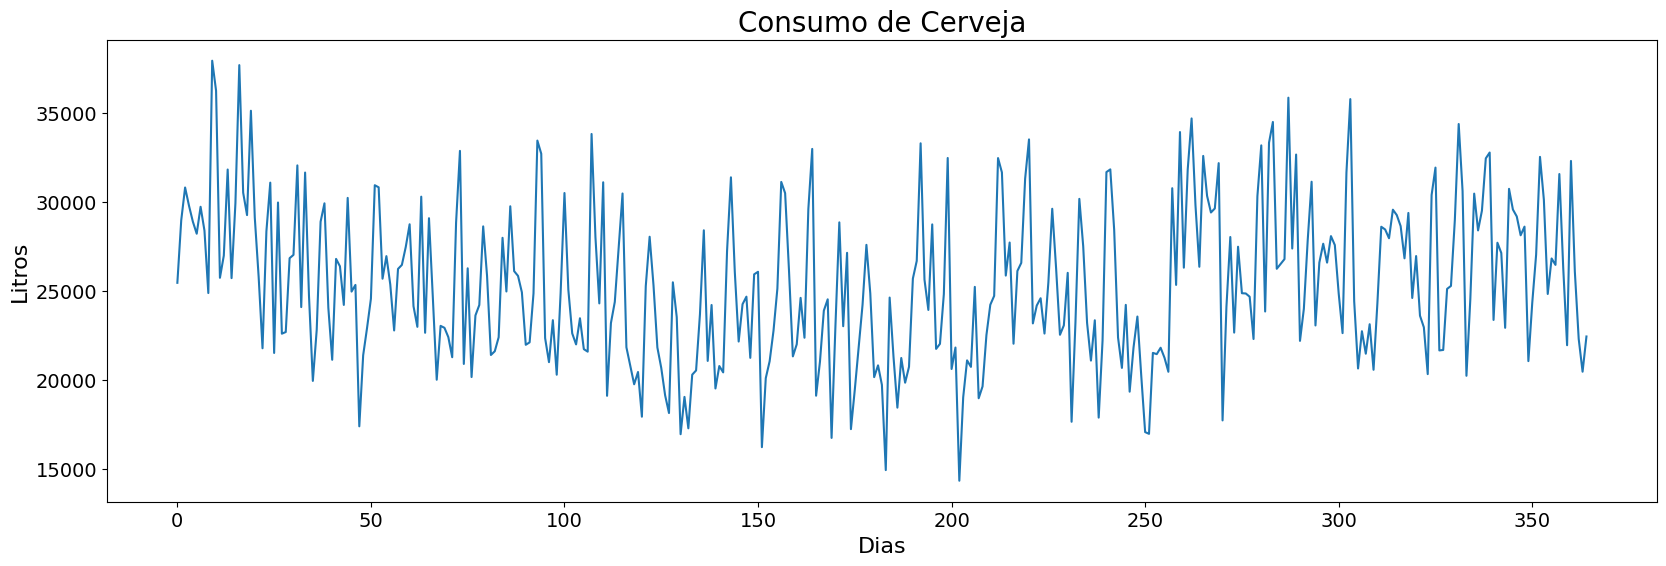

In [6]:
fig, ax = plt.subplots(figsize=(20,6))

ax.set_title('Consumo de Cerveja', fontsize=20)
ax.set_ylabel('Litros', fontsize=16)
ax.set_xlabel('Dias', fontsize=16)
ax = dados['consumo'].plot(fontsize=14)

Análise de distribuição de dados de consumo utilizando boxplot

<Axes: title={'center': 'Consumo de Cerveja'}, ylabel='Litros'>

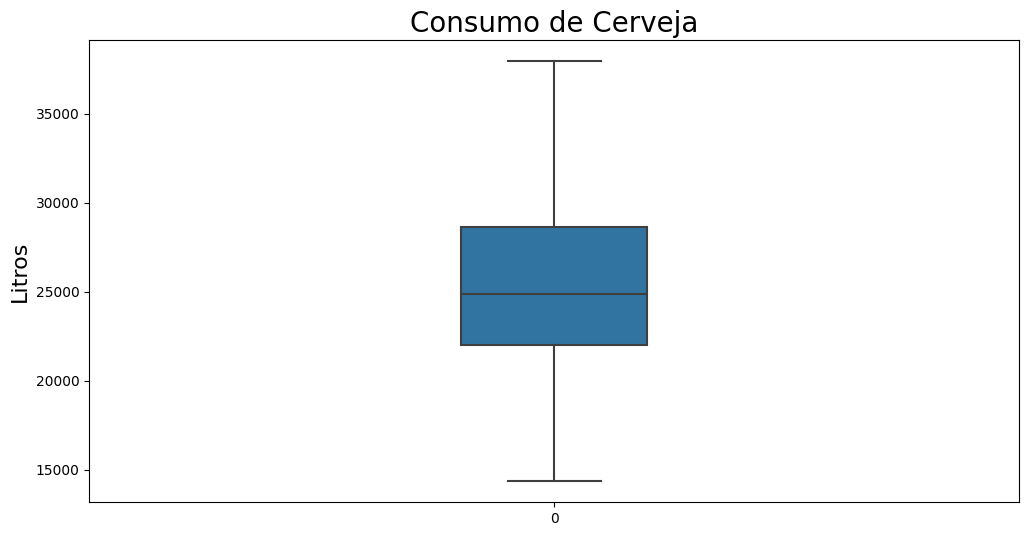

In [7]:
ax = sns.boxplot(data=dados['consumo'], orient='v', width=0.2)
ax.figure.set_size_inches(12, 6)
ax.set_title('Consumo de Cerveja', fontsize=20)
ax.set_ylabel('Litros', fontsize=16)
ax

Distribuição de dados de consumo de cerveja aos finais de semana (0 = não fim de semana; 1 = fim de semana)

<Axes: title={'center': 'Consumo de Cerveja'}, xlabel='Final de Semana', ylabel='Litros'>

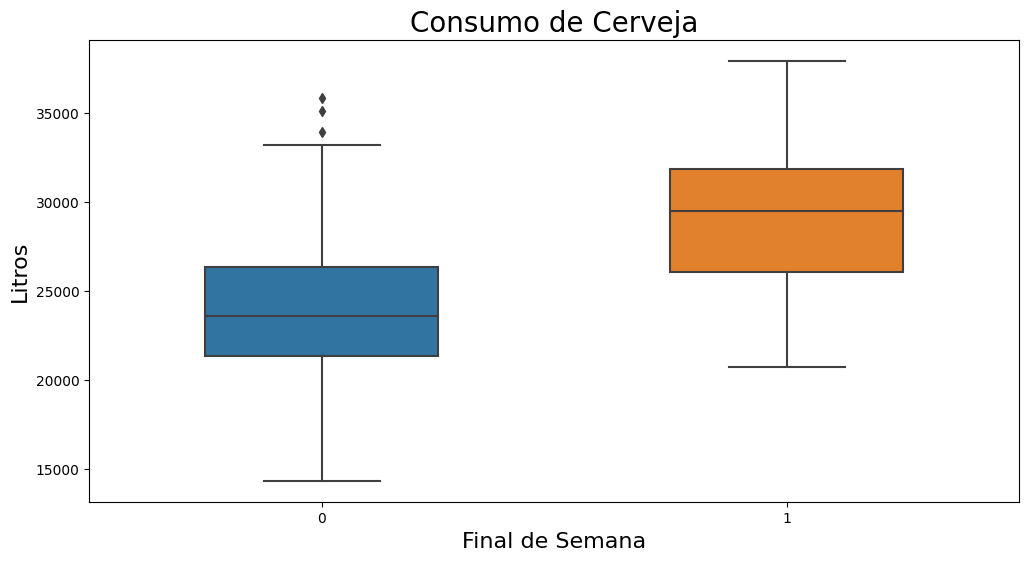

In [8]:
ax = sns.boxplot(y='consumo', x='fds', data=dados, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Consumo de Cerveja', fontsize=20)
ax.set_ylabel('Litros', fontsize=16)
ax.set_xlabel('Final de Semana', fontsize=16)
ax

<Axes: title={'center': 'Distrubuição de Frequências'}, xlabel='consumo', ylabel='Consumo de Cerveja(Litros)'>

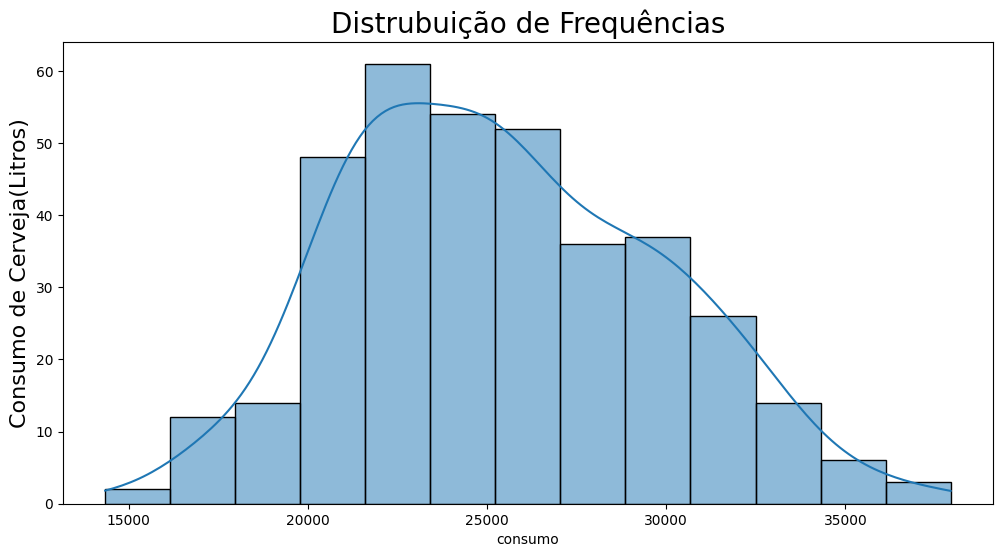

In [9]:
ax = sns.histplot(dados['consumo'], kde=True)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distrubuição de Frequências', fontsize=20)
ax.set_ylabel('Consumo de Cerveja(Litros)', fontsize=16)
ax

In [11]:
y = dados['consumo']

In [12]:
X = dados[['temp_max', 'chuva', 'fds']]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2811)

In [15]:
modelo = LinearRegression()

In [16]:
#treinando modelo
modelo.fit(X_train, y_train)

LinearRegression()

In [17]:
#calculando o coeficiente de determinação, (uma medida resumida do grau de ajuste da reta de regressão linear)
print('R² = {}'.format(modelo.score(X_train, y_train).round(2)))

R² = 0.73


In [20]:
y_previsto = modelo.predict(X_test)

In [21]:
#comparando coef =iciente de derminação dos dados de previsão e teste com dados reais
print('R² = %s' % metrics.r2_score(y_test, y_previsto).round(2))

R² = 0.69


In [22]:
#primeiro dado de condições estraído do dataset de testes
entrada = X_test[0:1]
entrada

,temp_max,chuva,fds
5,30.5,12.2,0


In [23]:
#prevendo consumo com os dados de entrada
modelo.predict(entrada)[0]

26094.901775262017

In [26]:
#prevendo consumo com dados personalizados
temp_max=40
chuva=0
fds=1
entrada=[[temp_max, chuva, fds]]

print('{0:.2f} litros'.format(modelo.predict(entrada)[0]))

38742.53 litros


c:\Users\brazi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Interpretação dos coeficientes:
Intercept: efeito médio em Y desconsiderando os efeitos das outras variáveis do modelo
Coeficientes de regressão: Efeito médio de Y considerando o efeito de um determinado X (variável explicativa)

In [27]:
modelo.intercept_

5951.9763393124485

In [29]:
#coeficiente de regressão das três variáveis selecionadas
modelo.coef_

array([ 684.73675898,  -60.7824355 , 5401.08333866])

In [30]:
X.columns

Index(['temp_max', 'chuva', 'fds'], dtype='object')

In [33]:
index = ['Intercept', 'Temp. Max', 'Chuva (mm)', 'Fim de Semana']

In [34]:
pd.DataFrame(data=np.append(modelo.intercept_, modelo.coef_), index=index, columns=['Parâmetros'])

,Parâmetros
Intercept,5951.976339
Temp. Max,684.736759
Chuva (mm),-60.782435
Fim de Semana,5401.083339


In [35]:
#previsões do modelo para os dados de treino.
y_previsto_train = modelo.predict(X_train)

<Axes: title={'center': 'Previsão X Real'}, xlabel='Consumo de Cerveja (litros) - Previsão', ylabel='Consumo de Cerveja (litros) - Real'>

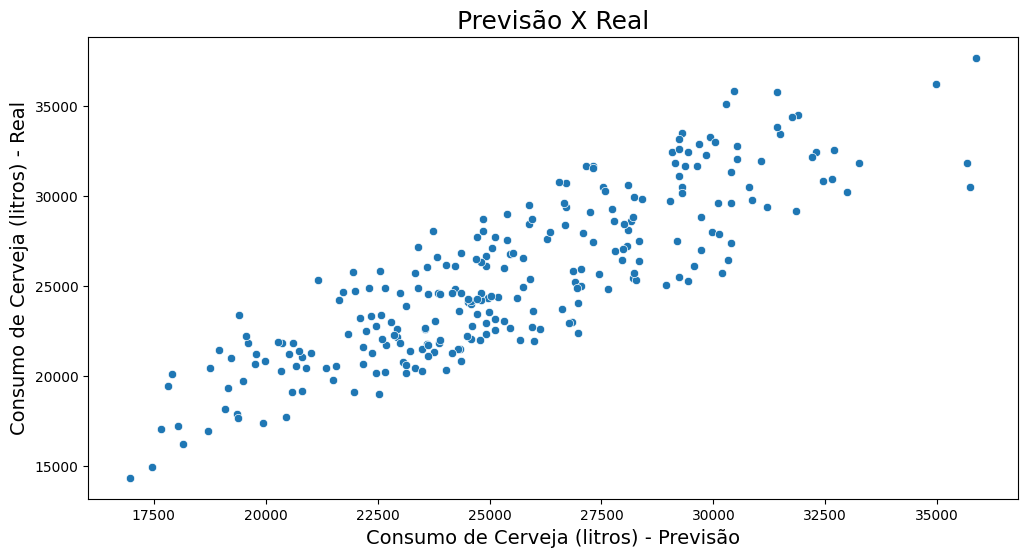

In [36]:
ax = sns.scatterplot(x=y_previsto_train, y=y_train)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão X Real', fontsize=18)
ax.set_xlabel('Consumo de Cerveja (litros) - Previsão', fontsize=14)
ax.set_ylabel('Consumo de Cerveja (litros) - Real', fontsize=14)
ax

As previsões ao final do gráfico parecem dispersas ao lidar com valores mais altos. Por isso analisaremos os residuos

In [37]:
residuo = y_train - y_previsto_train

<Axes: title={'center': 'Resíduos X Previsão'}, xlabel='Consumo de Cerveja (litros) - Previsão', ylabel='Resíduos'>

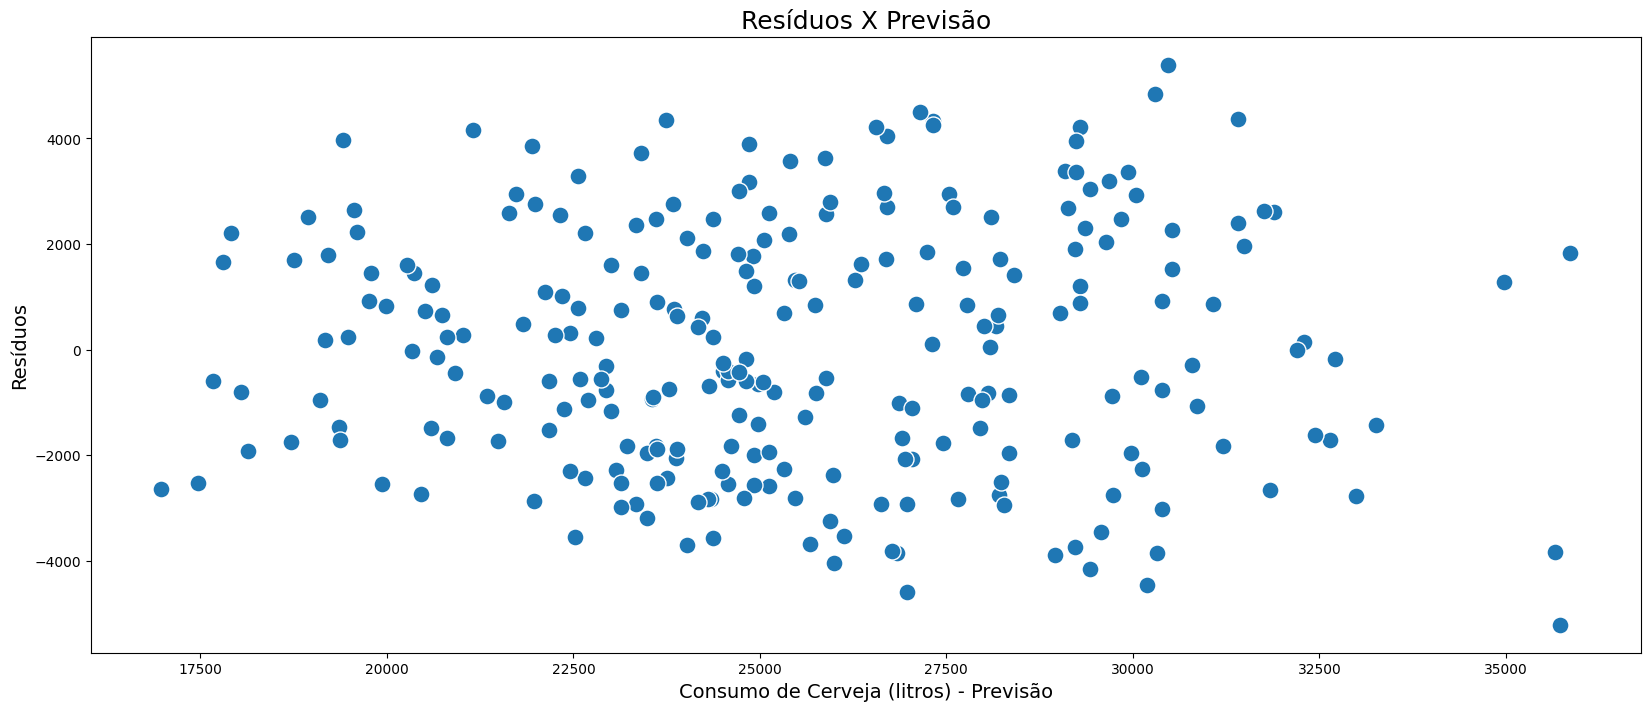

In [38]:
ax = sns.scatterplot(x=y_previsto_train, y=residuo, s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Resíduos X Previsão', fontsize=18)
ax.set_xlabel('Consumo de Cerveja (litros) - Previsão', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax

Se elevarmos os resíduos ao quadrado, torna-se ainda mais evidente a dispersão aolidar com valores mais altos

<Axes: title={'center': 'Resíduos X Previsão'}, xlabel='Consumo de Cerveja (litros) - Previsão', ylabel='Resíduos²'>

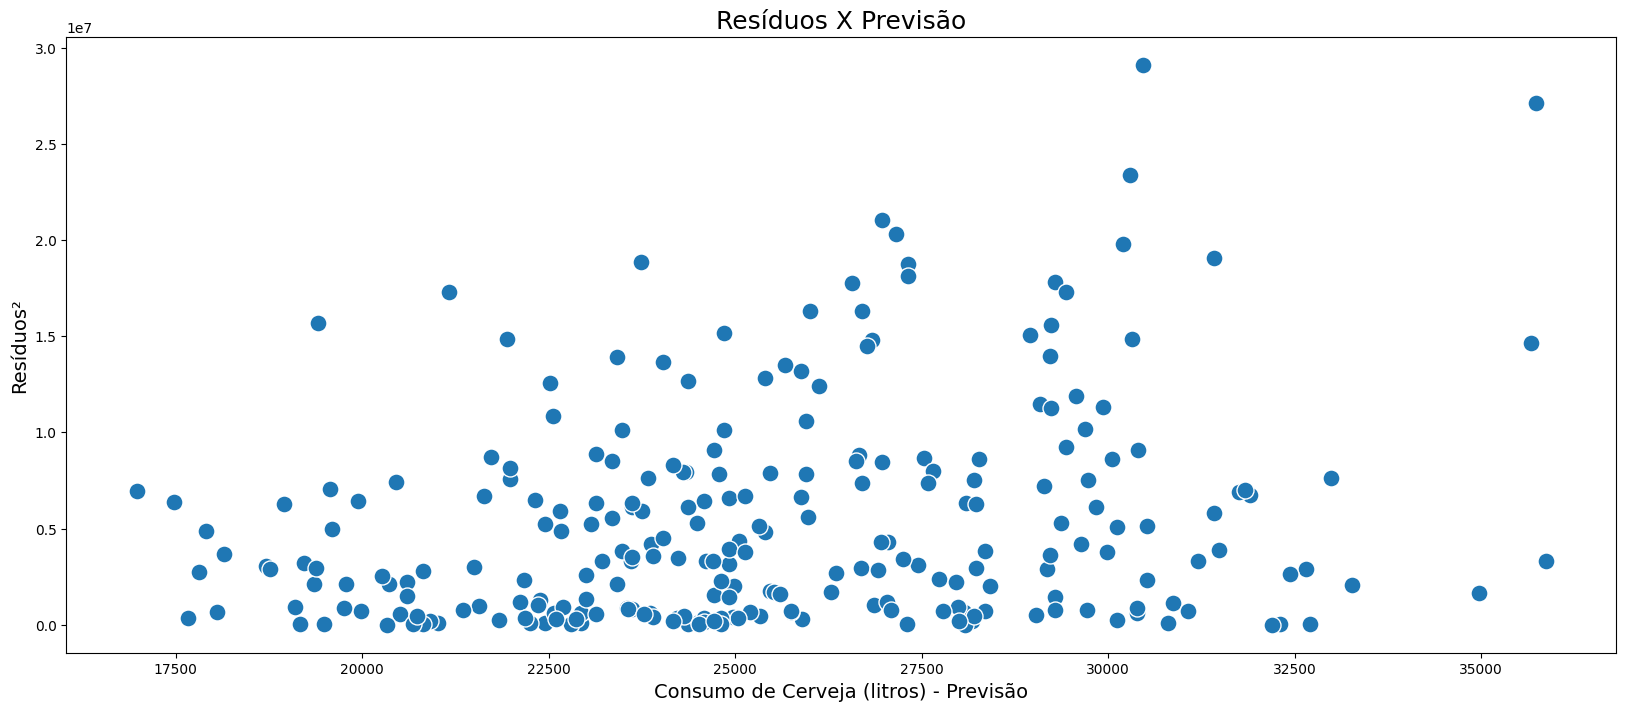

In [39]:
ax = sns.scatterplot(x=y_previsto_train, y=residuo**2, s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Resíduos X Previsão', fontsize=18)
ax.set_xlabel('Consumo de Cerveja (litros) - Previsão', fontsize=14)
ax.set_ylabel('Resíduos²', fontsize=14)
ax

<Axes: title={'center': 'Distribuição de Frequências dos Resíduos'}, xlabel='Litros', ylabel='Count'>

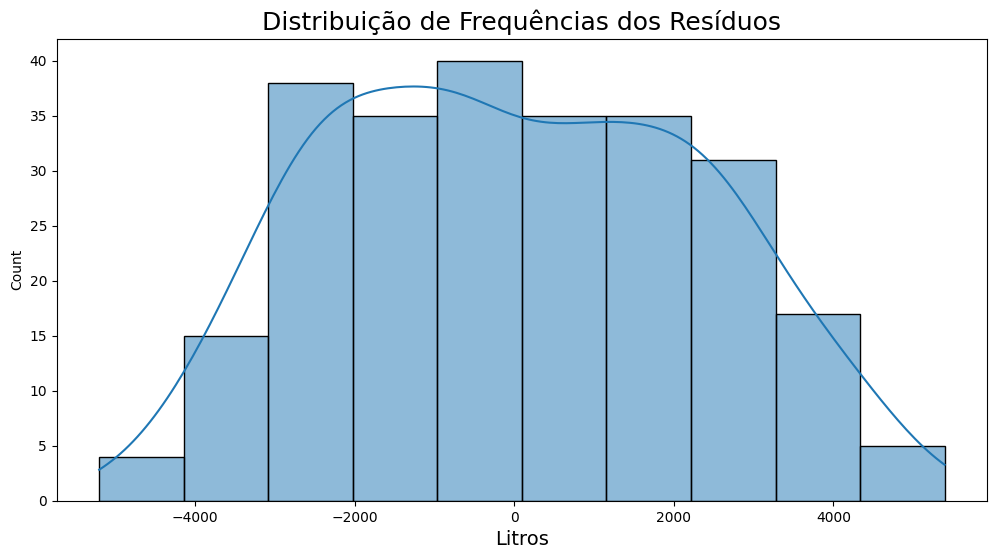

In [41]:
ax = sns.histplot(residuo, kde=True)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências dos Resíduos', fontsize=18)
ax.set_xlabel('Litros', fontsize=14)
ax

Testes de comparação de modelos

In [46]:
# novo conjunto de vairvéis X
X2 = dados[['temp_media', 'chuva', 'fds']]

In [47]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.3, random_state=2811)

In [49]:
modelo_2 = LinearRegression()

In [50]:
#treinando o novo modelo
modelo_2.fit(X2_train, y2_train)

LinearRegression()

In [54]:
print('Modelo com Temp. Média')
print('R² = {}'.format(modelo_2.score(X2_train, y2_train).round(2)))

Modelo com Temp. Média
R² = 0.66


In [53]:
print('Modelo com Tem. Máxima')
print('R² = {}'.format(modelo.score(X_train, y_train).round(2)))

Modelo com Tem. Máxima
R² = 0.73


Quanto mais próximo o valor do coeficiente de regressão estiver de 1, melhor é o ajuste do modelo. Percebemos que o modelo que usa temperatura média está defasado.

In [63]:
y_previsto_2 = modelo_2.predict(X2_test)

Média dos quadrados dos erros

In [64]:
EQM_2 = metrics.mean_squared_error(y2_test, y_previsto_2).round(2)
REQM_2 = np.sqrt(metrics.mean_squared_error(y2_test, y_previsto_2)).round(2) #aqui buscamos o menor valor possível
R2_2 = metrics.r2_score(y2_test, y_previsto_2).round(2)

pd.DataFrame([EQM_2, REQM_2, R2_2], ['EQM', 'REQM', 'R²'], columns=['Métricas'])

,Métricas
EQM,6060775.46
REQM,2461.86
R²,0.66


In [65]:
EQM = metrics.mean_squared_error(y_test, y_previsto).round(2)
REQM = np.sqrt(metrics.mean_squared_error(y_test, y_previsto)).round(2)
R2 = metrics.r2_score(y_test, y_previsto).round(2)

pd.DataFrame([EQM, REQM, R2], ['EQM', 'REQM', 'R²'], columns=['Métricas'])

,Métricas
EQM,5471976.38
REQM,2339.23
R²,0.69


In [66]:
X_test[0:1]

,temp_max,chuva,fds
5,30.5,12.2,0


In [67]:
entrada = X_test[0:1]

In [69]:
modelo.predict(entrada)[0]

26094.901775262017

In [70]:
temp_max = 30.5
chuva = 12.2
fds = 0
entrada = [[temp_max, chuva, fds]]
print('{0:.2f} litros'.format(modelo.predict(entrada)[0]))

26094.90 litros


c:\Users\brazi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [72]:
#Salvando o modelo com o pickle
output = open('modelo_consumo_cerveja', 'wb')
pickle.dump(modelo, output)
output.close()